# Crime Rate

### Basic import statement

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

arrest = pd.read_csv("arrests.csv")
arrest.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
18408,1997874,18046130,24.0,F,B,2018-03-12T01:35:00,"100 Block Penfort ST Pittsburgh, PA 15214",2701 Simple Assault.,"100 Block Penfort ST Pittsburgh, PA 15214",Northview Heights,1,2609.0,1.0,1.0,-80.002822,40.473350
11742,1989259,17152500,38.0,M,W,2017-08-12T18:19:00,"300 Block Birmingham AV Pittsburgh, PA 15210",2701 Simple Assault. / 13(a)(32) Paraphernalia...,"300 Block Birmingham AV Pittsburgh, PA 15210",Carrick,3,2902.0,4.0,3.0,-79.984019,40.402793
43052,2030105,20153057,37.0,F,W,2020-08-18T16:29:00,"Raven ST & Becks Run RD Pittsburgh, PA",13(a)(32) Paraphernalia - Use or Possession,"Raven ST & Becks Run RD Pittsburgh, PA",Carrick,3,2904.0,4.0,3.0,-79.981854,40.391061
26454,2008124,18235623,33.0,M,W,2018-12-12T09:30:00,"900 Block 2ND AV Pittsburgh, PA 15219",3925 Receiving Stolen Property.,"100 Block S 15th ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.983474,40.427953
39713,2025184,20021426,15.0,M,B,2020-01-31T15:00:00,"600 Block 1ST AV PITTSBURGH, PA 15219",2702 Aggravated Assault. / 5503(a)(4) DISORDER...,"1100 Block N MURTLAND ST PITTSBURGH, PA 15208",Homewood West,5,1207.0,9.0,2.0,-79.900145,40.460419


### Lists all the neighborhoods

In [5]:
towns = arrest["INCIDENTNEIGHBORHOOD"].unique()
print (towns)

['Bloomfield' 'Outside City' 'Westwood' 'East Allegheny' 'Crafton Heights'
 'Greenfield' 'Brookline' 'Regent Square' 'East Liberty' nan 'East Hills'
 'Carrick' 'Allegheny Center' 'South Side Flats' 'Sheraden'
 'East Carnegie' 'Golden Triangle/Civic Arena' 'Point Breeze North'
 'Perry South' 'Allentown' 'North Shore' 'Marshall-Shadeland'
 'Central Oakland' 'Middle Hill' 'Strip District'
 'Lincoln-Lemington-Belmar' 'Central Northside' 'Troy Hill-Herrs Island'
 'Highland Park' 'Homewood North' 'Northview Heights' 'Brighton Heights'
 'Hazelwood' 'Perry North' 'Bedford Dwellings' 'Elliott' 'Beechview'
 'Fineview' 'Glen Hazel' 'Spring Hill-City View' 'Bluff' 'Manchester'
 'Homewood West' 'Outside County' 'Point Breeze' 'Homewood South'
 'Squirrel Hill South' 'Terrace Village' 'Upper Lawrenceville' 'Arlington'
 'South Side Slopes' 'Lower Lawrenceville' 'Garfield' 'Lincoln Place'
 'Larimer' 'Mount Washington' 'California-Kirkbride' 'Banksville'
 'Bon Air' 'South Shore' 'Beltzhoover' 'Knoxville

### Counts the number of fatal/life-threatening arrests in each neighborhood
* Harassment, stalking, homicide, assault, misuse of firearms, reckless driving, terroristic threats, kidnapping, murder, strangulation, and missiles

In [6]:
severity = arrest['OFFENSES'].str.contains('Harassment|Stalking|Homicide|Assault|Firearms|Reckless Driving|Terroristic Threats|Kidnapping|Murder|Strangulation|Missiles|', regex = True).fillna(False)
crimes = arrest[severity]
crimes.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
25584,2007016,18175580,37.0,M,B,2018-11-02T21:58:00,"100 Block Hazlett ST Pittsburgh, PA 15214",2701 Simple Assault.,"800 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,1,2609.0,1.0,1.0,-79.999476,40.475752
6066,1982167,17036678,26.0,M,B,2017-02-28T01:00:00,"600 Block 1st AV Pittsburgh, PA 15219",3304 Criminal Mischief. / 2709(a)(1) Harassmen...,"100 Block Rhine PL Pittsburgh, PA 15212",Spring Hill-City View,1,2620.0,1.0,1.0,-79.994099,40.466786
14248,1992486,17206323,43.0,M,B,2017-10-25T14:00:00,"3800 Block O'Hara ST Pittsburgh, PA 15213",2706 Terroristic Threats.,"3800 Block O'Hara ST Pittsburgh, PA 15213",Central Oakland,4,405.0,8.0,3.0,-79.959560,40.443316
9476,1986545,17110336,57.0,M,B,2017-06-17T18:53:00,"Federal ST N & E North AV Pittsburgh, PA 15212",2701 Simple Assault. / 3921(a) Theft by Unlawf...,"1000 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.019796,40.454103
24973,2006233,18191247,15.0,M,B,2018-10-01T11:40:00,"600 Block 1ST AV PITTSBURGH, PA 15219",2701 Simple Assault. / 5501 Riot. / 5503 Disor...,"3100 Block CENTRE AV PITTSBURGH, PA 15219",Upper Hill,2,506.0,6.0,3.0,-79.962021,40.448843


### Graphs data

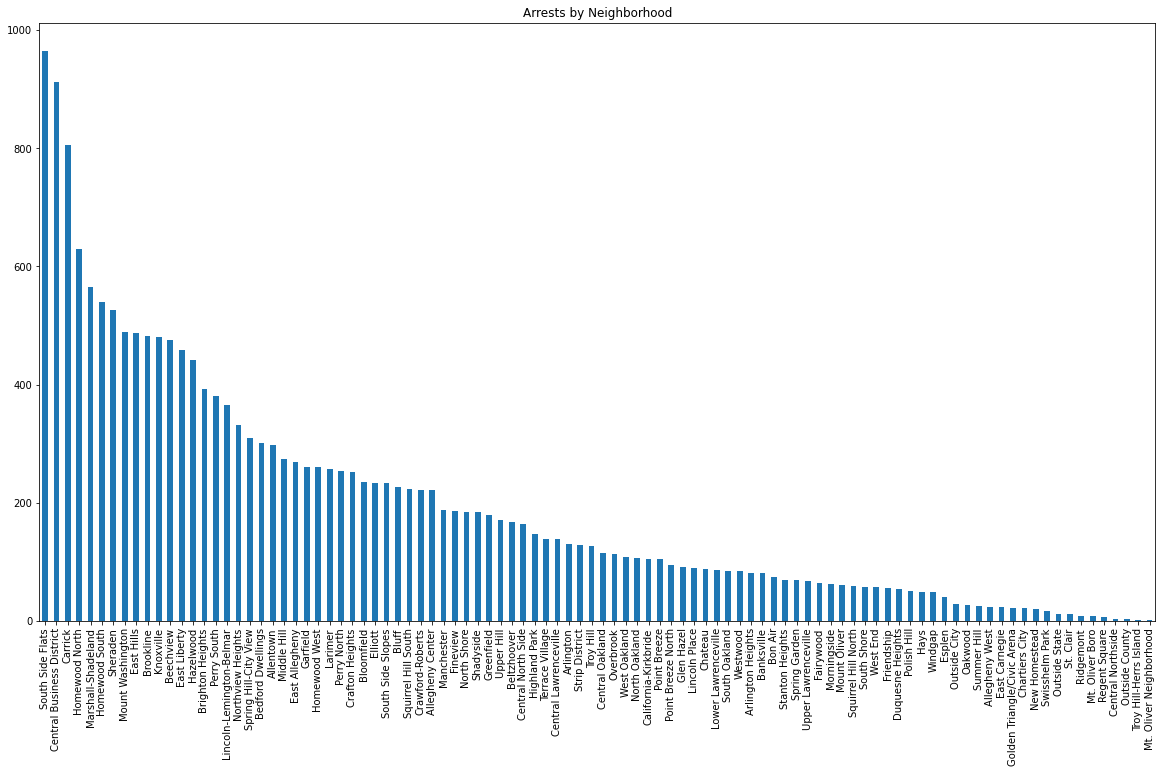

In [9]:
arrestNeighborhood=crimes["INCIDENTNEIGHBORHOOD"]
arrestNeighborhood.value_counts().sort_values(ascending = False).plot.bar(figsize=(20,11), title = "Arrests by Neighborhood")

The highest overall arrest data was in the Central Business District but when restricted to the more severe offenses, South Side Flats surpassed Central Business District by ****.

In [ ]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot(figsize=(20,11)) # plot the geopandas dataframe# do the merge
crime_map = neighborhoods.merge(arrestNeighborhood, how='left', left_on='hood', right_on="INCIDENTNEIGHBORHOOD")
crime_map
#crime_map.plot(column='number_of_steps')